In [19]:
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("../data/tmdb.movies.csv.gz")
df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [36]:
df.duplicated().value_counts()

False    26517
dtype: int64

In [44]:
df.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [22]:
dfmb = pd.read_csv("../data/tn.movie_budgets.csv.gz")
dfmb.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [23]:
dfmb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [24]:
dfmg = pd.read_csv("../data/bom.movie_gross.csv.gz")
dfmg.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [25]:
dfmg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [26]:
conn = sqlite3.connect("../data/im.db/im.db")
tables = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
tables

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [37]:
movie_basics_df = pd.read_sql("SELECT * FROM movie_basics", conn)
movie_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [41]:
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [39]:
movie_ratings_df = pd.read_sql("SELECT * FROM movie_ratings", conn)
movie_ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [40]:
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [42]:
movie_ratings_df.duplicated().value_counts()

False    73856
dtype: int64

In [43]:
movie_ratings_df.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [45]:
conn.close()

In [48]:
bom_df = pd.read_csv("../Notebooks/bom.movie_gross.csv")
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [49]:
tn = pd.read_csv("../Notebooks/tn.movie_budgets.csv")
tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [50]:
tn.shape

(5782, 6)

In [52]:
conn = sqlite3.connect("../data/im.db/im.db")


In [60]:
df['title'] = df['title'].astype(str).str.strip().str.lower()

In [53]:
imdf = pd.read_sql('''SELECT * FROM movie_basics;''',conn)
imdf

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [54]:
basics = pd.read_sql('''SELECT primary_title, 
                     start_year, 
                     genres 
                     FROM movie_basics;'''
                     ,conn)

basics

,primary_title,start_year,genres
0,Sunghursh,2013,"Action,Crime,Drama"
1,One Day Before the Rainy Season,2019,"Biography,Drama"
2,The Other Side of the Wind,2018,Drama
3,Sabse Bada Sukh,2018,"Comedy,Drama"
4,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"
...,...,...,...
146139,Kuambil Lagi Hatiku,2019,Drama
146140,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary
146141,Dankyavar Danka,2013,Comedy
146142,6 Gunn,2017,None


In [55]:
basics.info, imdf.info

(<bound method DataFrame.info of                                       primary_title  start_year  \
 0                                         Sunghursh        2013   
 1                   One Day Before the Rainy Season        2019   
 2                        The Other Side of the Wind        2018   
 3                                   Sabse Bada Sukh        2018   
 4                          The Wandering Soap Opera        2017   
 ...                                             ...         ...   
 146139                          Kuambil Lagi Hatiku        2019   
 146140  Rodolpho Teóphilo - O Legado de um Pioneiro        2015   
 146141                              Dankyavar Danka        2013   
 146142                                       6 Gunn        2017   
 146143               Chico Albuquerque - Revelações        2013   
 
                       genres  
 0         Action,Crime,Drama  
 1            Biography,Drama  
 2                      Drama  
 3               Comed

In [57]:
merged_b =pd.merge(tn,
                   basics,
                   left_on= 'movie',
                   right_on= 'primary_title',
                   how="inner")

In [58]:
merged_b.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,primary_title,start_year,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Avatar,2011,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides,2011,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Dark Phoenix,2019,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi"
4,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi"


In [59]:
merged_b.shape

(3815, 9)

# Objective 3: What is the effect of the production budget on profit?

In [62]:
merged_df = pd.read_csv('../Notebooks/merged_movies.csv')
merged_df

,movie_id,primary_title,start_year,genres,averagerating,numvotes,studio,domestic_gross_x,foreign_gross,popularity,...,title,total_gross,id,release_date,movie,production_budget,domestic_gross_income,worldwide_gross,profit,release_year
0,tt0359950,the secret life of walter mitty,2013,"Adventure,Comedy,Drama",7.3,275300.0,Fox,58200000.0,129900000.0,10.743,...,the secret life of walter mitty,188100000.0,37,"Dec 25, 2013",the secret life of walter mitty,91000000.0,58236838.0,1.878612e+08,9.686118e+07,2013
1,tt0365907,a walk among the tombstones,2014,"Action,Crime,Drama",6.5,105116.0,Uni.,26300000.0,26900000.0,19.373,...,a walk among the tombstones,53200000.0,67,"Sep 19, 2014",a walk among the tombstones,28000000.0,26017685.0,6.210859e+07,3.410859e+07,2014
2,tt0369610,jurassic world,2015,"Action,Adventure,Sci-Fi",7.0,539338.0,Uni.,652300000.0,1019.4,20.709,...,jurassic world,652301019.4,34,"Jun 12, 2015",jurassic world,215000000.0,652270625.0,1.648855e+09,1.433855e+09,2015
3,tt0376136,the rum diary,2011,"Comedy,Drama",6.2,94787.0,FD,13100000.0,10800000.0,12.011,...,the rum diary,23900000.0,16,"Oct 28, 2011",the rum diary,45000000.0,13109815.0,2.154473e+07,-2.345527e+07,2011
4,tt0383010,the three stooges,2012,"Comedy,Family",5.1,28570.0,Fox,44300000.0,10500000.0,9.358,...,john carter,54800000.0,4,"Apr 13, 2012",the three stooges,30000000.0,44338224.0,5.405225e+07,2.405225e+07,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,tt7388562,"paul, apostle of christ",2018,"Adventure,Biography,Drama",6.7,5662.0,Affirm,17600000.0,5500000.0,12.005,...,NaN,23100000.0,95,"Mar 23, 2018","paul, apostle of christ",5000000.0,17547999.0,2.552950e+07,2.052950e+07,2018
1329,tt7401588,instant family,2018,"Comedy,Drama",7.4,46728.0,Par.,67400000.0,53200000.0,22.634,...,NaN,120600000.0,20,"Nov 16, 2018",instant family,48000000.0,67363237.0,1.197362e+08,7.173619e+07,2018
1330,tt7535780,the great wall,2017,Documentary,6.5,24.0,Uni.,45500000.0,289400000.0,19.144,...,NaN,334900000.0,92,"Feb 17, 2017",the great wall,150000000.0,45157105.0,3.344869e+08,1.844869e+08,2017
1331,tt7784604,hereditary,2018,"Drama,Horror,Mystery",7.3,151571.0,A24,44100000.0,35300000.0,26.185,...,NaN,79400000.0,56,"Jun 8, 2018",hereditary,10000000.0,44069456.0,7.013390e+07,6.013390e+07,2018


In [63]:
print(merged_df[['production_budget', 'profit']].head())

   production_budget        profit
0         91000000.0  9.686118e+07
1         28000000.0  3.410859e+07
2        215000000.0  1.433855e+09
3         45000000.0 -2.345527e+07
4         30000000.0  2.405225e+07


In [68]:
correlation = merged_df['production_budget'].corr(merged_df['profit'])
print(f"Correlation between production budget and profit: {correlation:f}")

if correlation >= 0.7:
    print("➡ Strong positive correlation: higher budgets are strongly associated with higher profits.")
elif correlation >= 0.4:
    print("➡ Moderate positive correlation: higher budgets generally lead to higher profits.")
elif correlation > 0:
    print("➡ Weak positive correlation: higher budgets have a small effect on profit.")
elif correlation == 0:
    print("➡ No correlation: budget has no effect on profit.")
else:
    print("➡ Negative correlation: higher budgets tend to reduce profit.")


Correlation between production budget and profit: 0.649011
➡ Moderate positive correlation: higher budgets generally lead to higher profits.


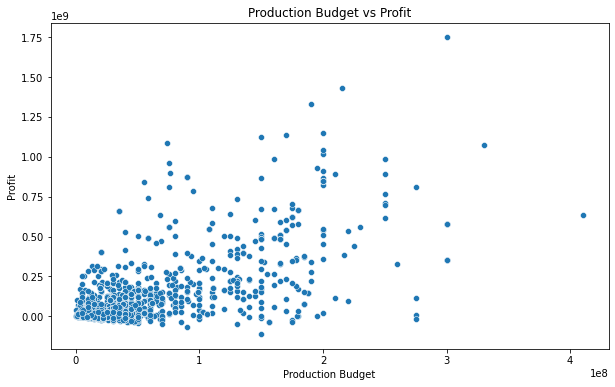

In [74]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='production_budget', y='profit', data=merged_df)
plt.title('Production Budget vs Profit')
plt.xlabel('Production Budget')
plt.ylabel('Profit')
plt.show()